### TRY - USD ANOMALLY DETECTİON

*Kocaeli University Electonics And Communication Engineering MEH405 lesson final project.*

- First demo prensentation deadline(21.12.2021) - DONE
- Final presentation deadline(24.12.2021)

*The project try to analyz anomally status in TRY-USD graphs.*

- Data Collection 
    - Web scrabbing from "Yahoo finans".
- Explaraty Data Analysis
- Model building 
- Anomally detection in graphs 

- Report analyz that we did -> Deadline 09.01.2022

### Data Collection PART

In [ ]:
# pip installs package
#pip install selenium 

In [1]:
# importing libraries that we used 
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore")
from selenium.webdriver.common.by import By 

In [2]:
# define a chrome driver path and get the webpage 
PATH = 'D:\Web_Scrabbing_Browser\chromedriver.exe'
driver = webdriver.Chrome(PATH)

driver.get('https://finance.yahoo.com/quote/TRY%3DX/history?p=TRY%3DX')

In [128]:
# collection the data columns
dates = driver.find_elements(By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr/td[1]')
open = driver.find_elements(By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr/td[2]')
high = driver.find_elements(By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr/td[3]')
low = driver.find_elements(By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr/td[4]')
close = driver.find_elements(By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/tbody/tr/td[5]')
features = driver.find_elements(By.XPATH, '//*[@id="Col1-1-HistoricalDataTable-Proxy"]/section/div[2]/table/thead')

In [129]:
# append the dataframe 
data_results = []
for i in range(len(dates)):
    dict_data = {
        'Dates': dates[i].text,
        'Open': open[i].text,
        'High':high[i].text,
        'Low':low[i].text,
        'Close':close[i].text,
    }
    data_results.append(dict_data)

In [130]:
# convert the data frame 
df = pd.DataFrame(data_results)

In [131]:
df

,Dates,Open,High,Low,Close
0,"Dec 21, 2021",13.5521,14.0352,11.0953,12.9324
1,"Dec 20, 2021",16.6034,18.3523,16.5909,16.6090
2,"Dec 17, 2021",15.6481,17.0317,15.6164,15.6608
3,"Dec 16, 2021",14.8274,15.7038,14.7583,14.8141
4,"Dec 15, 2021",14.3585,14.8133,14.3521,14.3778
...,...,...,...,...,...
3641,"Jan 07, 2008",1.1620,1.1735,1.1605,1.1615
3642,"Jan 04, 2008",1.1685,1.1721,1.1525,1.1721
3643,"Jan 03, 2008",1.1713,1.1747,1.1585,1.1686
3644,"Jan 02, 2008",1.1713,1.1738,1.1565,1.1712


### TRY-USD ANALYSIS
*This content analys the "TRY-USD" data with Exploraty Data Analysis and anomally detection*

- Importing Libraries
- Load data and first look data 
- Exploraty Data Analysis
- Anomally Detection

### Importing Libraries Data-Science PART

In [ ]:
import pandas as pd # data analysis 
import numpy as np # array math operation 
import matplotlib.pyplot as plt ,matplotlib.dates as md # visualization 
from matplotlib import dates as mpl_dates
import seaborn as sns # visualization 
sns.set_style('darkgrid')
from sklearn.ensemble import IsolationForest # our anomally detection model 
from sklearn.decomposition import PCA # convert the 2d space with method 

import warnings
warnings.filterwarnings('ignore')

In [132]:
# formatting and extraction the dates 
df['mount'] = pd.DatetimeIndex(df['Dates']).month
df['year'] = pd.DatetimeIndex(df['Dates']).year
df['day'] = pd.DatetimeIndex(df['Dates']).day

In [133]:
# collected data that we did 
df

,Dates,Open,High,Low,Close,mount,year,day
0,"Dec 21, 2021",13.5521,14.0352,11.0953,12.9324,12,2021,21
1,"Dec 20, 2021",16.6034,18.3523,16.5909,16.6090,12,2021,20
2,"Dec 17, 2021",15.6481,17.0317,15.6164,15.6608,12,2021,17
3,"Dec 16, 2021",14.8274,15.7038,14.7583,14.8141,12,2021,16
4,"Dec 15, 2021",14.3585,14.8133,14.3521,14.3778,12,2021,15
...,...,...,...,...,...,...,...,...
3641,"Jan 07, 2008",1.1620,1.1735,1.1605,1.1615,1,2008,7
3642,"Jan 04, 2008",1.1685,1.1721,1.1525,1.1721,1,2008,4
3643,"Jan 03, 2008",1.1713,1.1747,1.1585,1.1686,1,2008,3
3644,"Jan 02, 2008",1.1713,1.1738,1.1565,1.1712,1,2008,2


In [134]:
# formats columns 
print(df.info())

# remove the unknown strings columns 
df['Open'] = df[~df['Open'].str.contains("-", na=False)]['Open']
df['High'] = df[~df['High'].str.contains("-", na=False)]['High']
df['Low'] = df[~df['Low'].str.contains("-", na=False)]['Low']
df['Close'] = df[~df['Close'].str.contains("-", na=False)]['Close']

# formatting dtypes 
df['Open'] = df['Open'].astype('float64')
df['High'] = df['High'].astype('float64')
df['Low'] = df['Low'].astype('float64')
df['Close'] = df['Close'].astype('float64')
df['Dates'] = pd.to_datetime(df['Dates'])

# control the dtypes 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Dates   3646 non-null   object
 1   Open    3646 non-null   object
 2   High    3646 non-null   object
 3   Low     3646 non-null   object
 4   Close   3646 non-null   object
 5   mount   3646 non-null   int64 
 6   year    3646 non-null   int64 
 7   day     3646 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 228.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   3646 non-null   datetime64[ns]
 1   Open    3636 non-null   float64       
 2   High    3636 non-null   float64       
 3   Low     3636 non-null   float64       
 4   Close   3636 non-null   float64       
 5   mount   3646 non-null   int64         
 6   year    3646 n

In [137]:
df_model = df.copy()

In [138]:
df_model

,Dates,Open,High,Low,Close,mount,year,day
0,2021-12-21,13.5521,14.0352,11.0953,12.9324,12,2021,21
1,2021-12-20,16.6034,18.3523,16.5909,16.6090,12,2021,20
2,2021-12-17,15.6481,17.0317,15.6164,15.6608,12,2021,17
3,2021-12-16,14.8274,15.7038,14.7583,14.8141,12,2021,16
4,2021-12-15,14.3585,14.8133,14.3521,14.3778,12,2021,15
...,...,...,...,...,...,...,...,...
3641,2008-01-07,1.1620,1.1735,1.1605,1.1615,1,2008,7
3642,2008-01-04,1.1685,1.1721,1.1525,1.1721,1,2008,4
3643,2008-01-03,1.1713,1.1747,1.1585,1.1686,1,2008,3
3644,2008-01-02,1.1713,1.1738,1.1565,1.1712,1,2008,2


In [139]:
df.head()

,Dates,Open,High,Low,Close,mount,year,day
0,2021-12-21,13.5521,14.0352,11.0953,12.9324,12,2021,21
1,2021-12-20,16.6034,18.3523,16.5909,16.6090,12,2021,20
2,2021-12-17,15.6481,17.0317,15.6164,15.6608,12,2021,17
3,2021-12-16,14.8274,15.7038,14.7583,14.8141,12,2021,16
4,2021-12-15,14.3585,14.8133,14.3521,14.3778,12,2021,15


### Exploraty Data Analysis
- Years analysis

In [140]:
df_model.head()

,Dates,Open,High,Low,Close,mount,year,day
0,2021-12-21,13.5521,14.0352,11.0953,12.9324,12,2021,21
1,2021-12-20,16.6034,18.3523,16.5909,16.6090,12,2021,20
2,2021-12-17,15.6481,17.0317,15.6164,15.6608,12,2021,17
3,2021-12-16,14.8274,15.7038,14.7583,14.8141,12,2021,16
4,2021-12-15,14.3585,14.8133,14.3521,14.3778,12,2021,15


### General Analysis By Means, Medians, STDs

In [91]:
def general_statistics_by_year(df):

    # create list for year
    list_year = [2008,
                 2009,
                 2010,
                 2011,
                 2012,
                 2013,
                 2014,
                 2015,
                 2016,
                 2017,
                 2018,
                 2019,
                 2020,
                 2021]
    
    # create list for time status 
    list_time_value_status_general = ['Open','Close','High','Low']
    list_time_value_status_df = []
    
    # create list form of for df
    for j in list_time_value_status_general:
        list_time_value_status_df.extend(['{}'.format(j) for i in range(14)])
    
    # create df for means open
    df_year_time_value = pd.DataFrame(columns=['label_status','year','mean','median','std'], index=range(56))

    # create dataframe for means status by year
    for i,j,k in zip(4*list_year,range(56),list_time_value_status_df):
        df_year_time_value['mean'].loc[j] = df[df['year'] == i]['{}'.format(k)].mean()
        df_year_time_value['median'].loc[j] = df[df['year'] == i]['{}'.format(k)].median()
        df_year_time_value['std'].loc[j] = df[df['year'] == i]['{}'.format(k)].std()
        df_year_time_value['year'].loc[j] = '{}'.format(i)
        df_year_time_value['label_status'].loc[j] = '{}'.format(k)
    
    return list_year, df_year_time_value

In [92]:
list_year, df_year_time_value = general_statistics_by_year(df_model)

In [93]:
df_year_time_value['year'] = pd.to_datetime(df_year_time_value['year']).dt.year

In [94]:
def general_statiscs_visualization(df, list_year):

      # correlation map graph
    fig, axs = plt.subplots(2,2, figsize=(15,15))

    #scatter plot graphs 
    sns.barplot(data = df[df['label_status'] == 'Close'], 
    x = 'year', 
    y = 'mean', 
    color = 'red', 
    alpha = 0.8, 
    label = 'mean',
    ax = axs[0][0])
    
    sns.barplot(data = df[df['label_status'] == 'Close'], 
    x = 'year', 
    y = 'median', 
    color = 'red', 
    alpha = 1, 
    label = 'median',
    ax = axs[0][0])
    axs[0][0].set_xlabel('Years', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[0][0].set_ylabel('Means', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[0][0].set_title('Statistics mean and median close by year BARPLOT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15})
    axs[0][0].legend(loc = 'best')

    sns.barplot(data = df[df['label_status'] == 'Close'], 
    x = 'year', 
    y = 'std', 
    color = 'red', 
    alpha = 1, 
    label = 'mean',
    ax = axs[0][1])
    axs[0][1].set_title('Statistics std open by year BARPLOT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15})
    
    sns.lineplot(data = df[df['label_status'] == 'Close'], 
    x = 'mean', 
    y = 'year', 
    color = 'red', 
    linewidth = 5,
    alpha = 0.4, 
    label = 'mean',
    ax = axs[1][0])

    sns.lineplot(data = df[df['label_status'] == 'Close'], 
    x = 'median', 
    y = 'year', 
    color = 'black', 
    linewidth = 5,
    alpha = 0.7, 
    label = 'median',
    ax = axs[1][0])
    axs[1][0].legend(loc = 'best')
    axs[1][0].set_title('Statistics mean and median close by year LINEPLOT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15})

    sns.lineplot( 
    x = 'std', 
    y = 'year', 
    data = df[df['label_status'] == 'Close'],
    color = 'black', 
    alpha = 1, 
    label = 'std',
    linewidth = 5,
    ax = axs[1][1])
    axs[1][1].legend(loc = 'best')
    axs[1][1].set_title('Statistics STD close by year LINEPLOT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15})

    
    plt.show()


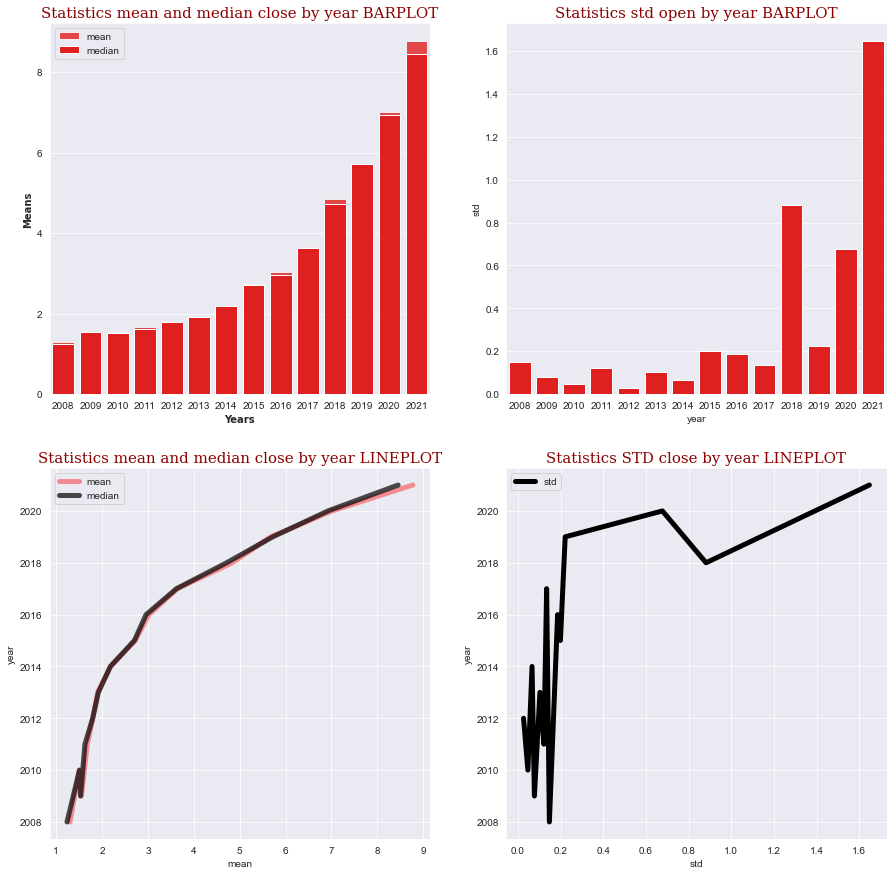

In [95]:
general_statiscs_visualization(df_year_time_value,list_year)

### Special analysis By Mount Anomally Years
- 2008,2010,2012 -> Normal statics year for TRY 
- 2021,2020,2018 -> Anomally statics years for TRY 

In [96]:
# prepare the datas
########################### Normal year ###########################

######### 2008 #########
df_2008 = df_model[df_model['year'] == 2008]
######### 2010 #########
df_2010 = df_model[df_model['year'] == 2010]
######### 2012 #########
df_2012 = df_model[df_model['year'] == 2012]

########################### Anormally year ###########################
######### 2018 #########
df_2018 = df_model[df_model['year'] == 2018]
######### 2020 #########
df_2020 = df_model[df_model['year'] == 2020]
######### 2021 #########
df_2021 = df_model[df_model['year'] == 2021]


### Normal years analyz by mount 

In [97]:
def special_analyz_mount(df):

    # create df for mean, median, std 
    df_year_by_mount = pd.DataFrame(columns=['label_status','mount','mean','median','std'], index=range(12))

    for i,j in zip(range(12), range(1,13)):
         # statiscs 
         df_year_by_mount['mean'].loc[i] = df[df['mount'] == j]['Close'].mean()
         df_year_by_mount['median'].loc[i] = df[df['mount'] == j]['Close'].median()
         df_year_by_mount['std'].loc[i] = df[df['mount'] == j]['Close'].std()
         
         # labelling 
         df_year_by_mount['label_status'] = 'Close'
         df_year_by_mount['mount'].loc[i] = '{}'.format(j)

    return df_year_by_mount

In [98]:
########################### Normal year ###########################
######### 2008 #########
df_2008_analyz = special_analyz_mount(df_2008)
######### 2010 #########
df_2010_analyz = special_analyz_mount(df_2010)
######### 2012 #########
df_2012_analyz = special_analyz_mount(df_2012)

########################### Anormally year ###########################
######### 2018 #########
df_2018_analyz = special_analyz_mount(df_2018)
######### 2020 #########
df_2020_analyz = special_analyz_mount(df_2020)
######### 2021 #########
df_2021_analyz = special_analyz_mount(df_2021)

In [99]:
def normal_anormally_analyz_by_mount(df_2008, df_2010, df_2012, df_2018, df_2020, df_2021):
    
    # Figure building
    fig, axs = plt.subplots(4,3, figsize=(20,20))
    
    ############################ Normal year analysis by mean ############################
    sns.barplot(data = df_2008, 
    x = 'mount', 
    y = 'mean', 
    color = 'red', 
    alpha = 1, 
    label = 'mean',
    ax = axs[0][0])
    axs[0][0].set_xlabel('Mount', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[0][0].set_ylabel('Means', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[0][0].set_title('2008 YEAR MEAN ANALYSIS BY MOUNT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})

    sns.barplot(data = df_2010, 
    x = 'mount', 
    y = 'mean', 
    color = 'red', 
    alpha = 1, 
    label = 'mean',
    ax = axs[0][1])
    axs[0][1].set_xlabel('Mount', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[0][1].set_ylabel('Means', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[0][1].set_title('2010 YEAR MEAN ANALYSIS BY MOUNT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})


    sns.barplot(data = df_2012, 
    x = 'mount', 
    y = 'mean', 
    color = 'red', 
    alpha = 1, 
    label = 'mean',
    ax = axs[0][2])
    axs[0][2].set_xlabel('Mount', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[0][2].set_ylabel('Means', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[0][2].set_title('2012 YEAR MEAN ANALYSIS BY MOUNT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})

    ############################ Anormally year analysis by mean ############################
    sns.barplot(data = df_2018, 
    x = 'mount', 
    y = 'mean', 
    color = 'red', 
    alpha = 1, 
    label = 'mean',
    ax = axs[1][0])
    axs[1][0].set_xlabel('Mount', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[1][0].set_ylabel('Means', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[1][0].set_title('2018 YEAR MEAN ANALYSIS BY MOUNT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})

    sns.barplot(data = df_2020, 
    x = 'mount', 
    y = 'mean', 
    color = 'red', 
    alpha = 1, 
    label = 'mean',
    ax = axs[1][1])
    axs[1][1].set_xlabel('Mount', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[1][1].set_ylabel('Means', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[1][1].set_title('2020 YEAR MEAN ANALYSIS BY MOUNT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})


    sns.barplot(data = df_2021, 
    x = 'mount', 
    y = 'mean', 
    color = 'red', 
    alpha = 1, 
    label = 'mean',
    ax = axs[1][2])
    axs[1][2].set_xlabel('Mount', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[1][2].set_ylabel('Means', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[1][2].set_title('2021 YEAR MEAN ANALYSIS BY MOUNT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})

    ############################ Normal year analysis by std ############################
    sns.barplot(data = df_2008, 
    x = 'mount', 
    y = 'std', 
    color = 'black', 
    alpha = 1, 
    label = 'std',
    ax = axs[2][0])
    axs[2][0].set_xlabel('Mount', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[2][0].set_ylabel('Std', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[2][0].set_title('2008 YEAR STD ANALYSIS BY MOUNT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})

    sns.barplot(data = df_2010, 
    x = 'mount', 
    y = 'std', 
    color = 'black', 
    alpha = 1, 
    label = 'std',
    ax = axs[2][1])
    axs[2][1].set_xlabel('Mount', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[2][1].set_ylabel('Std', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[2][1].set_title('2010 YEAR STD ANALYSIS BY MOUNT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})


    sns.barplot(data = df_2012, 
    x = 'mount', 
    y = 'mean', 
    color = 'black', 
    alpha = 1, 
    label = 'std',
    ax = axs[2][2])
    axs[2][2].set_xlabel('Mount', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[2][2].set_ylabel('Std', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[2][2].set_title('2012 YEAR STD ANALYSIS BY MOUNT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})
    ############################ Anormally year analysis by std ############################
    sns.barplot(data = df_2018, 
    x = 'mount', 
    y = 'std', 
    color = 'black', 
    alpha = 1, 
    label = 'std',
    ax = axs[3][0])
    axs[3][0].set_xlabel('Mount', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[3][0].set_ylabel('Std', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[3][0].set_title('2018 YEAR STD ANALYSIS BY MOUNT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})

    sns.barplot(data = df_2020, 
    x = 'mount', 
    y = 'std', 
    color = 'black', 
    alpha = 1, 
    label = 'std',
    ax = axs[3][1])
    axs[3][1].set_xlabel('Mount', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[3][1].set_ylabel('Std', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[3][1].set_title('2020 YEAR STD ANALYSIS BY MOUNT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})


    sns.barplot(data = df_2021, 
    x = 'mount', 
    y = 'std', 
    color = 'black', 
    alpha = 1, 
    label = 'std',
    ax = axs[3][2])
    axs[3][2].set_xlabel('Mount', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[3][2].set_ylabel('Std', fontdict= { 'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    axs[3][2].set_title('2021 YEAR STD ANALYSIS BY MOUNT',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})
    
    plt.show()

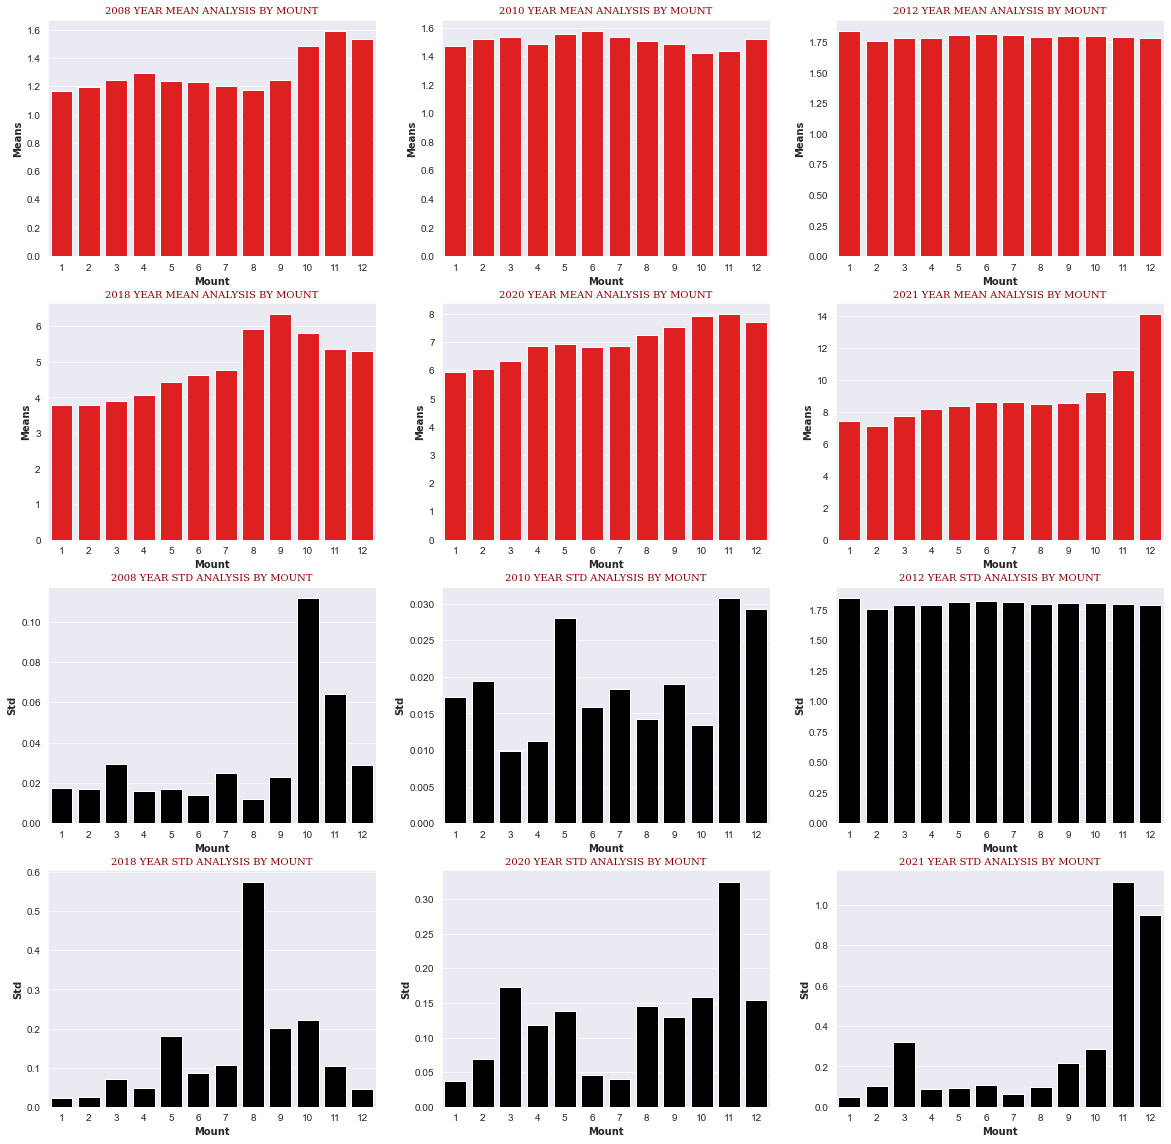

In [100]:
normal_anormally_analyz_by_mount(df_2008_analyz, 
                                df_2010_analyz, 
                                df_2012_analyz,
                                df_2018_analyz,
                                df_2020_analyz,
                                df_2021_analyz)

### Mean And Median Analysis 

In [101]:
def median_mean_analyz(df):
    
    # years
    list_year = [2008,
                 2009,
                 2010,
                 2011,
                 2012,
                 2013,
                 2014,
                 2015,
                 2016,
                 2017,
                 2018,
                 2019,
                 2020,
                 2021]
    
    # df copy 
    df_model = df.copy()

    # mean median thresholding and labelling 
    for i in list_year:

        df_model['{}_label_median'.format(i)] = pd.cut(df[df['year'] == i].Close, 
        bins = [-np.Inf,df[df['year'] == i].Close.median(), np.Inf], 
        labels = ['lower median', 'upper median']) 

        df_model['{}_label_mean'.format(i)] = pd.cut(df[df['year'] == i].Close, 
        bins = [-np.Inf,df[df['year'] == i].Close.mean(), np.Inf], 
        labels = ['lower mean', 'upper mean']) 

    return df_model

In [102]:
df_mean_median_analyz = median_mean_analyz(df_model)

In [103]:

############################ Normal years ############################
############################ 2008 ####################################
df_mean_median_analyz_2008 = df_mean_median_analyz[df_mean_median_analyz['year'] == 2008]
############################ 2010 ####################################
df_mean_median_analyz_2010 = df_mean_median_analyz[df_mean_median_analyz['year'] == 2010]
############################ 2012 ####################################
df_mean_median_analyz_2012 = df_mean_median_analyz[df_mean_median_analyz['year'] == 2012]

############################ Anormal years ############################
############################ 2008 #####################################
df_mean_median_analyz_2018 = df_mean_median_analyz[df_mean_median_analyz['year'] == 2018]
############################ 2010 #####################################
df_mean_median_analyz_2020 = df_mean_median_analyz[df_mean_median_analyz['year'] == 2020]
############################ 2012 #####################################
df_mean_median_analyz_2021 = df_mean_median_analyz[df_mean_median_analyz['year'] == 2021]

In [104]:
def pie_chart_mean_median(df):

    # list year 
    list_year = [2008,
                 2010,
                 2012,
                 2018,
                 2020,
                 2021]
    
    # labelled, colors
    mylabels = ['upper-mean', 'lower-mean']
    mylabels_2 = ['lower-median', 'uppper-median']
    myexplode = [0,0]
    colors = ['red', 'yellow']
    
    fig, ax = plt.subplots(2,6,figsize = (25,7))
    # plotting 
    for i,j in zip(list_year,range(6)):
        
        # mean part 
        edges, texts, autotexts = ax[0][j].pie(df[df['year'] == i]['{}_label_mean'.format(i)].value_counts(),
                                                labels = mylabels, 
                                                explode = myexplode, 
                                                autopct='%1.0f%%',
                                                shadow = True,
                                                colors = colors)
        plt.setp(autotexts, size = 25, weight ="bold")
        ax[0][j].set_title('{}-label Median Percantge'.format(i), 
                fontdict = {'family': 'serif',
                'color':  'darkred',
                'weight': 'normal',
                'size': 10})
        ax[0][j].legend(loc = 'best', prop={'size': 9})
        
        # median part 
        edges, texts, autotexts = ax[1][j].pie(df[df['year'] == i]['{}_label_median'.format(i)].value_counts(),
                                                labels = mylabels_2, 
                                                explode = myexplode, 
                                                autopct='%1.0f%%',
                                                shadow = True,
                                                colors = colors)
        plt.setp(autotexts, size = 25, weight ="bold")
        ax[1][j].set_title('{}-label Median Percantge'.format(i), 
                fontdict = {'family': 'serif',
                'color':  'darkred',
                'weight': 'normal',
                'size': 10})
        ax[1][j].legend(loc = 'best', prop={'size': 9})
    plt.show()
            

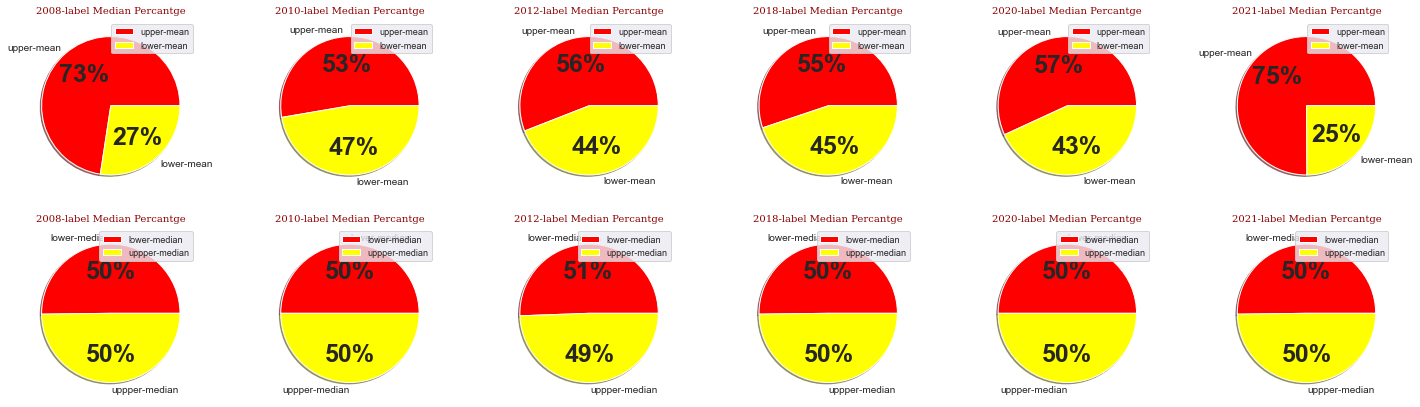

In [105]:
pie_chart_mean_median(df_mean_median_analyz)

### Anormally years for anomally detection models

In [106]:
def isolation_forest_anomally_detect(df):
    
    # model building 
    clf=IsolationForest(n_estimators=100, max_samples='auto', 
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
    
    # copy the df 
    df_anomally = df.copy()
    
    # fitting processes 
    clf.fit(df_anomally['Close'].values.reshape(-1,1))
    pred = clf.predict(df_anomally['Close'].values.reshape(-1,1))

    # labelling outliers
    df_anomally['anomally'] = pred
    return df_anomally 

In [107]:
######################## Anomally years ########################
######### 2018 #########
df_2018_anomally = isolation_forest_anomally_detect(df_2018)
######### 2020 #########
df_2020_anomally = isolation_forest_anomally_detect(df_2020)
######### 2021 #########
df_2021_anomally = isolation_forest_anomally_detect(df_2021)


In [108]:
######################## Normally years ########################
######### 2008 #########
df_2008.dropna(inplace = True) 
df_2008_anomally = isolation_forest_anomally_detect(df_2008)
######### 2010 #########
df_2010.dropna(inplace = True) 
df_2010_anomally = isolation_forest_anomally_detect(df_2010)
######### 2012 #########
df_2012_anomally = isolation_forest_anomally_detect(df_2012)

In [109]:
######################## 2008-2021 ########################
df_model.dropna(inplace = True)
df_main_anomally = isolation_forest_anomally_detect(df_model)

In [112]:
def anomally_detection_visiualization_if(df_2018, df_2020, df_2021, df_2008, df_2010, df_2012, df_main):

    fig, ax = plt.subplots(3,3, figsize=(20,20))
    
    # formatting dates
    df_main['Dates'] = pd.to_datetime(df_main['Dates'], format = '%m-%d-%Y')

    df_2018['Dates'] = pd.to_datetime(df_2018['Dates'], format = '%m-%d-%Y')
    df_2020['Dates'] = pd.to_datetime(df_2020['Dates'], format = '%m-%d-%Y')
    df_2021['Date'] = pd.to_datetime(df_2021['Dates'], format = '%m-%d-%Y')
    
    df_2008['Dates'] = pd.to_datetime(df_2008['Dates'], format = '%m-%d-%Y')
    df_2010['Dates'] = pd.to_datetime(df_2010['Dates'], format = '%m-%d-%Y')
    df_2012['Dates'] = pd.to_datetime(df_2012['Dates'], format = '%m-%d-%Y')

    #################################### Anomally MAIN #################################### 
    sns.scatterplot(x='Dates', y='Close', data=df_main_anomally[df_main['anomally'] == -1], color = 'red', ax = ax[0][1],  s=70)
    sns.lineplot(x='Dates', y='Close', data=df_main, ax = ax[0][1])
    ax[0][1].set_title('2008-2021 ANOMALLY DETECTION',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})

    #################################### Anomally years #################################### 
    sns.lineplot(x='Dates', y='Close', data=df_2018, ax = ax[1][0])
    sns.scatterplot(x='Dates', y='Close', data=df_2018[df_2018['anomally'] == -1], color = 'red', ax = ax[1][0])
    ax[1][0].set_title('2018 YEAR ANOMALLY DETECTION',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})

    sns.lineplot(x='Dates', y='Close', data=df_2020, ax = ax[1][1])
    sns.scatterplot(x='Dates', y='Close', data=df_2020[df_2020['anomally'] == -1], color = 'red', ax = ax[1][1])
    ax[1][1].set_title('2020 YEAR ANOMALLY DETECTION',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})

    sns.lineplot(x='Dates', y='Close', data=df_2021, ax = ax[1][2])
    sns.scatterplot(x='Dates', y='Close', data=df_2021[df_2021['anomally'] == -1], color = 'red', ax = ax[1][2])
    ax[1][2].set_title('2021 YEAR ANOMALLY DETECTION',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})
    #################################### Normally years #################################### 
    sns.lineplot(x='Dates', y='Close', data=df_2008, ax = ax[2][0])
    sns.scatterplot(x='Dates', y='Close', data=df_2008[df_2008['anomally'] == -1], color = 'red', ax = ax[2][0])
    ax[2][0].set_title('2008 YEAR ANOMALLY DETECTION',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})

    sns.lineplot(x='Dates', y='Close', data=df_2010, ax = ax[2][1])
    sns.scatterplot(x='Dates', y='Close', data=df_2010[df_2010['anomally'] == -1], color = 'red', ax = ax[2][1])
    ax[2][1].set_title('2010 YEAR ANOMALLY DETECTION',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})

    sns.lineplot(x='Dates', y='Close', data=df_2012, ax = ax[2][2])
    sns.scatterplot(x='Dates', y='Close', data=df_2012[df_2012['anomally'] == -1], color = 'red', ax = ax[2][2])
    ax[2][2].set_title('2012 YEAR ANOMALLY DETECTION',fontdict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10})
    # show the plot
    plt.show()

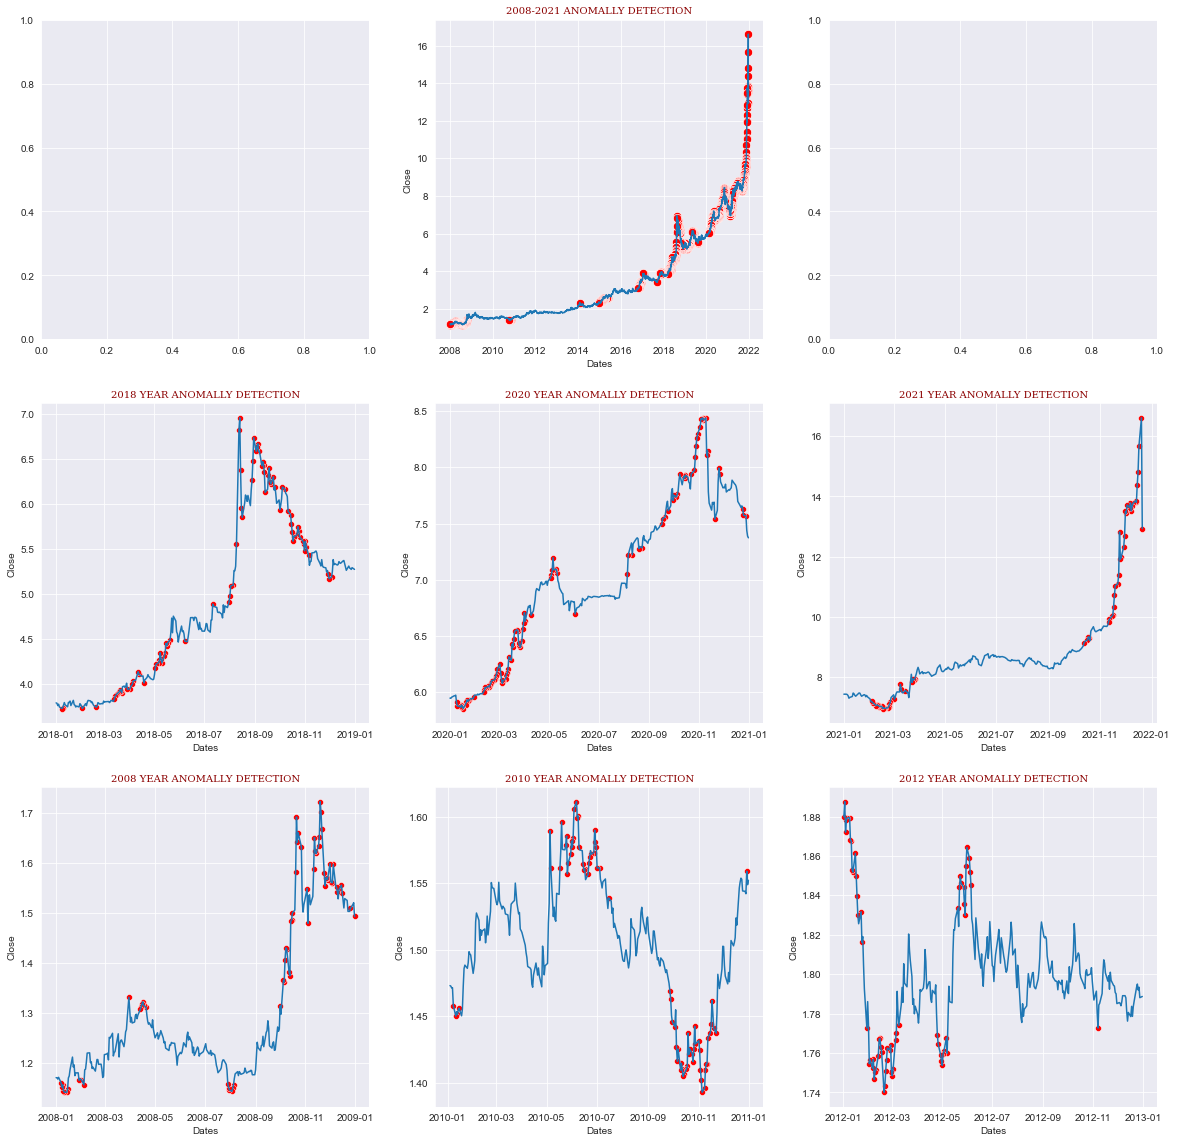

In [113]:
anomally_detection_visiualization_if(df_2018_anomally, 
                                    df_2020_anomally, 
                                    df_2021_anomally, 
                                    df_2008_anomally,
                                    df_2010_anomally,
                                    df_2012_anomally,
                                    df_main_anomally)

### Convert the 2-D Space With PCA 

In [152]:
def convert_2d_space_PCA(df):

    # copy the df 
    df_pca = df.copy()
    
    # drop and temp the dates 
    dates = df_pca['Dates'] 
    df_pca.drop(['Dates','mount','year','day'], inplace = True, axis = 1)
    df_pca.dropna(inplace = True, axis = 0)

    # model building 
    pca = PCA(n_components=1)

    # convert the 2d space 
    df_2d = pca.fit_transform(df_pca)

    # testing the pca processes 
    print('The variances are : {}'.format(pca.explained_variance_ratio_))

    return df_2d, dates 

In [153]:
df_2d, dates = convert_2d_space_PCA(df)

The variances are : [0.99974574]


In [155]:
# convert the dataframe 
df_2d = pd.DataFrame(df_2d)
df_2d['Dates'] = dates
df_2d

,0,Dates
0,19.032950,2021-12-21
1,27.298601,2021-12-20
2,25.197218,2021-12-17
3,23.267675,2021-12-16
4,22.163858,2021-12-15
...,...,...
3631,-4.460147,2008-01-21
3632,-4.456280,2008-01-18
3633,-4.452342,2008-01-17
3634,-4.452489,2008-01-16


In [156]:
def anomaly_detection_2d_if(df):

    # formatting dates 
    df['Dates'] = pd.to_datetime(df['Dates'], format = '%Y-%m-%d')

    # model building 
    clf=IsolationForest(n_estimators=100, max_samples='auto', 
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
    
    # fitting processes 
    clf.fit(df[0].values.reshape(-1,1))
    pred = clf.predict(df[0].values.reshape(-1,1))

    # labelling anomalies 
    df['anomally'] = pred

    return df

In [157]:
df_2d_anomally = anomaly_detection_2d_if(df_2d)

In [158]:
def anomally_detection_2d_visualization(df):

    # build a figure 
    fig, ax = plt.subplots(figsize = (7,7))

    # plotting 
    sns.scatterplot(data = df[df['anomally'] ==-1], 
                    x = 'Dates', 
                    y = 0, 
                    s = 70,
                    color = 'red')
    sns.lineplot(data = df[df['anomally'] ==-1],
                x = 'Dates',
                y = 0)
    plt.title('2-D 2008-2021 ANOMALY DETECION', 
             fontdict = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10})
    ax.set_xlabel('Dates', fontdict = {'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    ax.set_ylabel('PCA-Values', fontdict = {'fontsize': 10, 'fontweight':'bold','fontfamily':'Lucid'})
    
    plt.show()

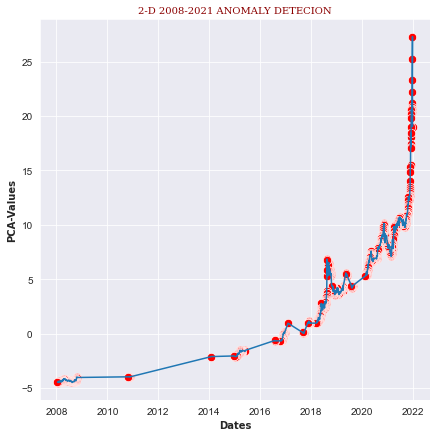

In [159]:
anomally_detection_2d_visualization(df_2d_anomally)

### LSTM - Anomally Detection